In [1]:
import numpy as np
import pandas as pd
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import importlib

In [2]:
import fctns
importlib.reload(fctns)

/proj/nest/msa0303/anaconda3/envs/tf_1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/proj/nest/msa0303/anaconda3/envs/tf_1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/proj/nest/msa0303/anaconda3/envs/tf_1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/proj/nest/msa0303/anaconda3

<module 'fctns' from '/proj/cnapl-gd/msa0303/play/fctns.py'>

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '5'

In [39]:
import tensorflow as tf
from functools import partial

logits = tf.Variable(np.random.uniform(size=(3,5)), dtype=tf.float32)
probits = tf.nn.softmax(logits)

draw = fctns.reloss_draw(logits, const=1.)
#draw = fctns.gumbel_softmax(logits, temp=1.)
gt = [.3, .2, .4, .1, 0.]
true = tf.constant([gt], dtype=tf.float32)
loss = tf.reduce_mean(-true*(tf.log(draw+1e-8) - tf.log(true+1e-8)))
true_loss = tf.reduce_mean(-true*(tf.log(probits+1e-8) - tf.log(true+1e-8)))

In [37]:
grad_log = tf.gradients(loss, logits)[0]
train_op = logits.assign(logits - 1e-2*grad_log)

In [38]:
losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(30000):
        _, l, p = sess.run([train_op, true_loss, probits])
        if i == 0:
            p0 = p
        losses.append(l)
        if not (i+1) % 5000 or i==0:
            print(f'step {(i+1)}: loss {l}')

step 1: loss 0.08749263733625412
step 5000: loss 0.18814776837825775
step 10000: loss 1.1484133005142212
step 15000: loss 1.296187162399292
step 20000: loss 1.6473687887191772
step 25000: loss 1.6660629510879517


KeyboardInterrupt: 

In [31]:
print(p0)

[[0.25982732 0.1819592  0.1858964  0.12950891 0.24280815]
 [0.19749446 0.15655573 0.20267351 0.25344908 0.18982716]
 [0.15721363 0.15847184 0.3366834  0.20683448 0.14079666]]


In [32]:
print(p)

[[0.2718489  0.23405536 0.3668188  0.12727699 0.        ]
 [0.29100305 0.227847   0.3480938  0.13305618 0.        ]
 [0.30993453 0.22868489 0.33535445 0.12602614 0.        ]]


In [17]:
print(gt)

[0.3, 0.2, 0.4, 0.1, 0.0]


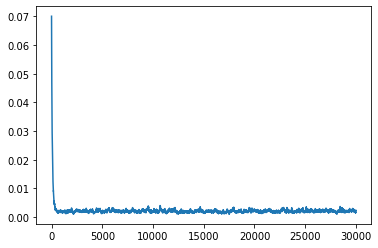

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)

<Figure size 432x288 with 0 Axes>

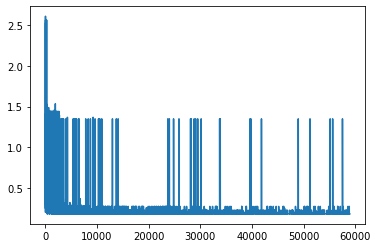

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(_losses)
plt.figure()

<Figure size 432x288 with 0 Axes>

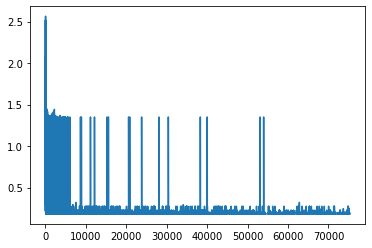

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(_losses)
plt.figure()

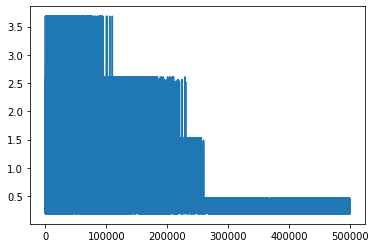

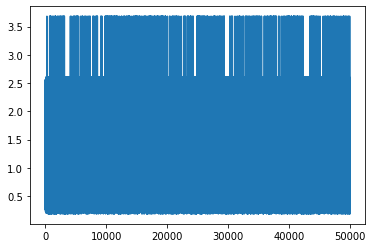

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.figure()
plt.plot(_losses)

In [8]:
p

array([[0.31925362, 0.07101371, 0.40709978, 0.2026329 , 0.        ],
       [0.25282013, 0.00269901, 0.5394345 , 0.20504637, 0.        ],
       [0.11973349, 0.37627432, 0.11451579, 0.3894764 , 0.        ]],
      dtype=float32)

In [9]:
gt

[0.3, 0.2, 0.4, 0.1, 0.0]

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

/proj/nest/msa0303/anaconda3/envs/tf_1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/proj/nest/msa0303/anaconda3/envs/tf_1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/proj/nest/msa0303/anaconda3/envs/tf_1.x/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/proj/nest/msa0303/anaconda3

In [2]:
tf.__version__

'1.14.0'

In [3]:
tfp.__version__

'0.7.0'

In [4]:
import os

In [5]:
os.environ['CUDA_VISIBLE_DEVICES'] = '5'

In [34]:
temperature = 1
logits = [[-2, 2, 0], [1,1,1]]
dist = tfp.distributions.RelaxedOneHotCategorical(temperature, logits=logits)

In [35]:
print(dist.distribution)
print()
print(dist)

tfp.distributions.ExpRelaxedOneHotCategorical("ExpRelaxedOneHotCategorical_2/", batch_shape=[2], event_shape=[3], dtype=float32)

tfp.distributions.RelaxedOneHotCategorical("RelaxedOneHotCategorical_2/", batch_shape=[2], event_shape=[3], dtype=float32)


In [36]:
s = dist.sample()

In [37]:
s = dist.sample()
with tf.Session() as sess:
    print(sess.run(s))

[[0.02701709 0.88821936 0.08476364]
 [0.35445455 0.03645992 0.60908556]]


In [16]:
inpt = tf.constant([0,0,0,1], dtype=tf.float32)
x = inpt / tf.reduce_sum(inpt)
y0 = tf.reduce_sum(inpt)
y1 = tf.reduce_sum(x)

g0 = tf.gradients(y0, inpt)[0]
g1 = tf.gradients(y1, inpt)[0]

with tf.Session() as sess:
    chk0, chk1 = sess.run([g0,g1])

In [17]:
chk0

array([1., 1., 1., 1.], dtype=float32)

In [18]:
chk1

array([0., 0., 0., 0.], dtype=float32)